In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5397 (42.8753, 45.1812) (43.2811, 45.2000)  1.9189 (Jnode 202)\n',
 't_n104        30.3251 (27.0674, 32.7628) (27.2888, 32.9130)  5.6242 (Jnode 201)\n',
 't_n105        29.3508 (26.1534, 31.8056) (26.4224, 32.0122)  5.5898 (Jnode 200)\n',
 't_n106        26.6901 (23.7156, 29.1720) (23.8802, 29.3196)  5.4394 (Jnode 199)\n',
 't_n107        25.9735 (23.0572, 28.4163) (23.1446, 28.4944)  5.3498 (Jnode 198)\n',
 't_n108        24.6070 (21.8458, 27.0231) (21.9574, 27.1196)  5.1622 (Jnode 197)\n',
 't_n109        12.4413 (11.2155, 14.3180) (11.0961, 14.1436)  3.0475 (Jnode 196)\n',
 't_n110        12.3321 (11.1205, 14.1972) (11.0114, 14.0399)  3.0286 (Jnode 195)\n',
 't_n111        11.9676 (10.8070, 13.7790) (10.7030, 13.6063)  2.9033 (Jnode 194)\n',
 't_n112        11.4847 (10.3793, 13.2098) (10.2312, 13.0149)  2.7837 (Jnode 193)\n',
 't_n113        10.9072 ( 9.8779, 12.5600) ( 9.7210, 12.3257)  2.6047 (Jnode 192)\n',
 't_n114         7.3182 ( 6.4362,  8.5485) ( 6.3562,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.5397,
 30.3251,
 29.3508,
 26.6901,
 25.9735,
 24.607,
 12.4413,
 12.3321,
 11.9676,
 11.4847,
 10.9072,
 7.3182,
 4.3671,
 2.5184,
 2.0474,
 8.2861,
 7.0423,
 11.4586,
 7.1129,
 10.9888,
 8.779,
 7.1387,
 5.9547,
 10.6907,
 10.0674,
 2.7863,
 11.8423,
 10.6956,
 8.2995,
 6.6492,
 7.2884,
 6.6387,
 5.5381,
 5.4654,
 22.9958,
 18.7284,
 24.8377,
 22.9459,
 21.5398,
 17.9004,
 9.6391,
 17.2238,
 15.1564,
 13.4845,
 11.428,
 20.9181,
 19.4256,
 5.3073,
 2.3731,
 27.6971,
 25.9993,
 23.5269,
 22.8612,
 24.8524,
 17.269,
 20.8676,
 16.8401,
 29.6565,
 28.1327,
 25.7887,
 24.3803,
 20.8748,
 13.9025,
 18.5822,
 25.327,
 8.3282,
 25.5082,
 35.4771,
 34.7127,
 33.9936,
 32.6697,
 30.2501,
 28.901,
 27.9073,
 26.733,
 23.9194,
 20.7786,
 17.5732,
 24.2259,
 22.7803,
 18.1596,
 20.6084,
 26.1432,
 24.1037,
 22.2895,
 19.3319,
 13.1641,
 24.6553,
 22.1627,
 19.593,
 28.7848,
 27.2797,
 25.8744,
 22.9994,
 16.9836,
 25.8191,
 17.8486,
 14.3701,
 5.6666,
 34.4125,
 30.1238]

In [7]:
lower_ci_iqtree

[5.1812,
 2.7628,
 1.8056,
 9.172,
 8.4163,
 7.0231,
 4.318,
 4.1972,
 3.779,
 3.2098,
 0.8779,
 0.4362,
 0.2085,
 0.3602,
 0.3558,
 0.1581,
 0.9087,
 3.1924,
 0.8094,
 0.904,
 0.6719,
 0.9992,
 0.5327,
 0.4917,
 0.8785,
 0.7347,
 3.6392,
 0.5245,
 0.0039,
 0.3477,
 0.1363,
 0.5273,
 0.5292,
 0.0004,
 5.5037,
 1.7246,
 7.2805,
 5.4654,
 4.1078,
 0.7612,
 0.4457,
 0.2287,
 8.2654,
 6.571,
 0.5983,
 3.6324,
 2.275,
 0.552,
 0.0456,
 0.2048,
 8.6635,
 6.6023,
 6.0498,
 7.6194,
 1.2567,
 4.1273,
 0.5477,
 2.1286,
 0.669,
 8.5192,
 7.2519,
 4.0579,
 8.3332,
 1.9747,
 8.2653,
 0.6695,
 8.5724,
 7.1068,
 6.1529,
 5.3088,
 3.7542,
 1.5363,
 0.3197,
 9.4139,
 8.3743,
 5.9627,
 3.2163,
 0.4491,
 6.183,
 4.8917,
 1.0093,
 3.0454,
 7.855,
 6.0723,
 4.4996,
 1.9485,
 6.7064,
 6.5497,
 4.4135,
 2.2437,
 0.2503,
 8.9706,
 7.8222,
 5.5364,
 0.6181,
 7.8957,
 1.1882,
 7.8976,
 0.2197,
 6.1268,
 2.4747]

In [8]:
upper_ci_iqtree

[43.2811,
 27.2888,
 26.4224,
 23.8802,
 23.1446,
 21.9574,
 11.0961,
 11.0114,
 10.703,
 10.2312,
 12.56,
 8.5485,
 4.811,
 2.7331,
 2.903,
 9.7118,
 8.3458,
 10.2011,
 8.8324,
 12.6559,
 10.2413,
 8.4619,
 7.6472,
 12.4202,
 11.7253,
 4.0729,
 10.5161,
 12.3119,
 9.7109,
 7.9808,
 8.3062,
 7.6527,
 6.5501,
 7.3691,
 20.3638,
 15.5418,
 22.0955,
 20.3303,
 18.7746,
 14.7301,
 12.9735,
 14.0282,
 12.0371,
 10.3851,
 14.4262,
 18.083,
 16.4588,
 8.1546,
 4.0668,
 24.6947,
 23.0451,
 20.4065,
 19.5544,
 21.7003,
 12.2842,
 17.3271,
 12.7894,
 26.6875,
 25.0943,
 22.8151,
 21.3614,
 17.6296,
 10.3943,
 15.1441,
 22.1299,
 12.8746,
 22.0067,
 34.2231,
 33.6759,
 33.0811,
 32.2601,
 28.9817,
 27.3213,
 26.2181,
 24.9979,
 21.7238,
 18.0725,
 14.4457,
 22.0645,
 20.492,
 14.8561,
 18.083,
 24.2851,
 22.0113,
 20.0478,
 16.8387,
 10.2061,
 22.6313,
 19.7391,
 16.8039,
 27.1412,
 25.2954,
 23.5543,
 20.0709,
 12.5129,
 23.4043,
 14.7022,
 10.9646,
 8.3686,
 32.9063,
 27.0219]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

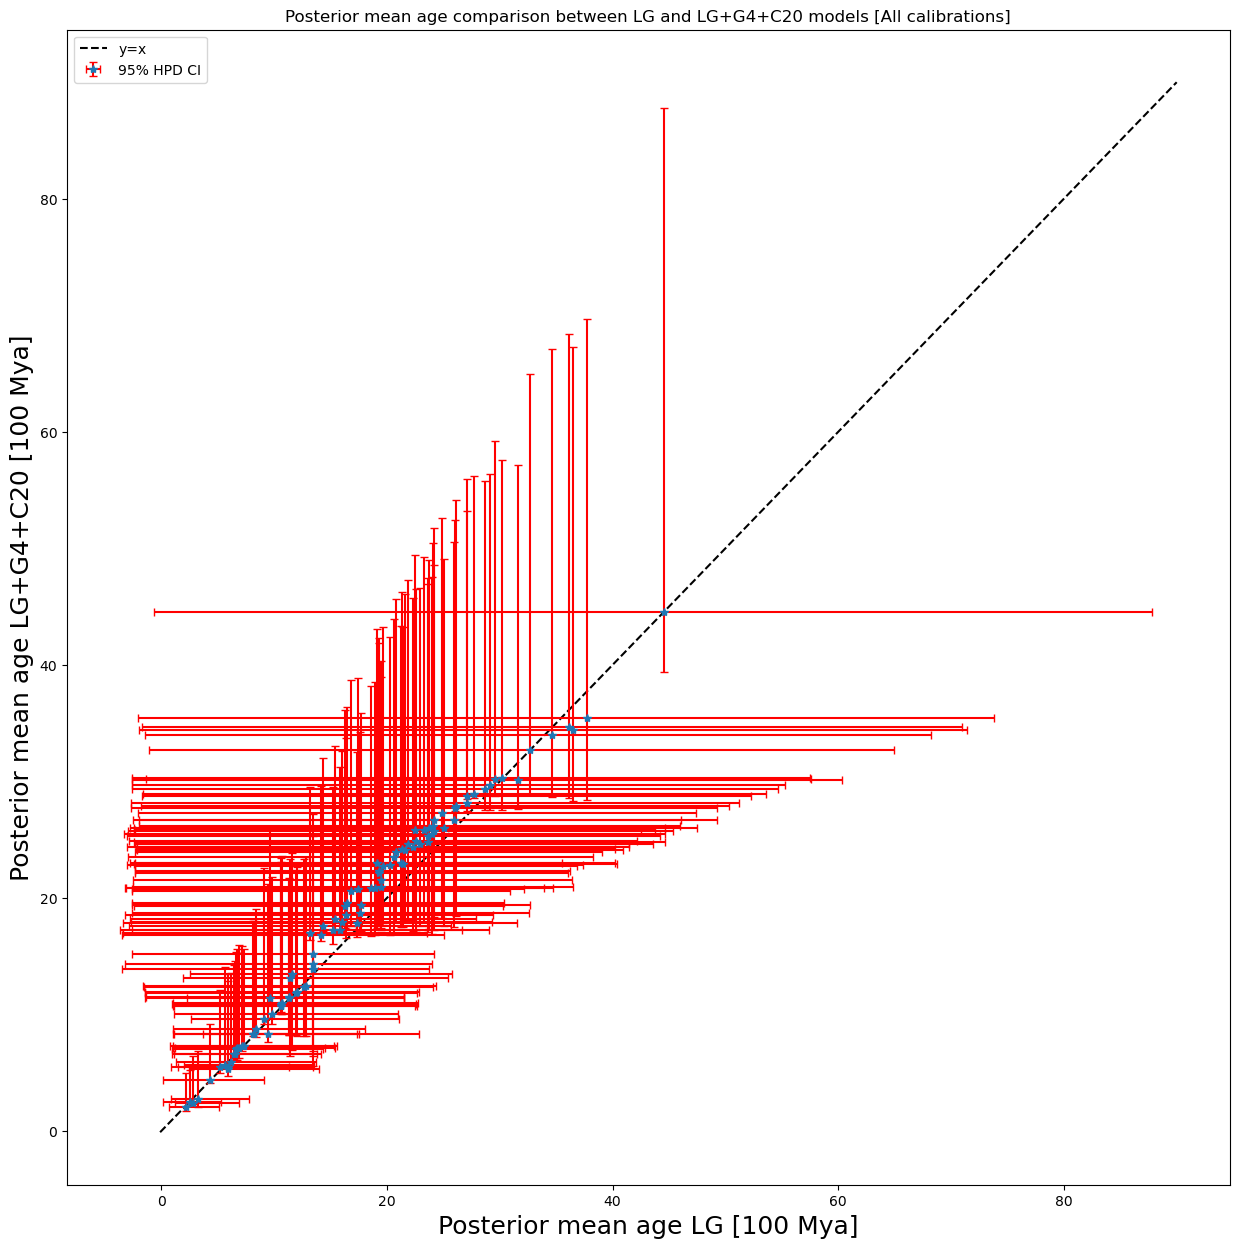

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_all.png')

In [11]:
posterior_mean_baseml

[44.5419,
 30.1968,
 28.7294,
 25.9738,
 25.0315,
 22.9717,
 12.8445,
 12.6671,
 12.0081,
 11.3271,
 10.6247,
 7.1656,
 4.3586,
 2.5319,
 2.2311,
 8.0947,
 6.6379,
 11.3156,
 6.9303,
 10.7008,
 8.4111,
 6.6862,
 6.1684,
 10.6302,
 9.8206,
 3.2392,
 11.9333,
 10.5796,
 8.1907,
 6.495,
 7.3147,
 6.4245,
 5.1869,
 5.9575,
 21.267,
 17.5896,
 23.6037,
 21.3943,
 19.4631,
 16.0143,
 9.0777,
 15.8382,
 13.4635,
 11.6266,
 9.5965,
 19.4896,
 17.6895,
 5.8954,
 2.7775,
 26.0222,
 23.7456,
 20.6398,
 20.2357,
 22.5526,
 15.2451,
 18.5812,
 14.1638,
 29.148,
 27.1185,
 24.2179,
 22.2782,
 18.9631,
 13.422,
 16.3417,
 23.6828,
 9.4609,
 24.0399,
 37.7588,
 36.1424,
 34.6238,
 32.6819,
 29.5544,
 27.7356,
 26.1239,
 24.1326,
 20.7755,
 17.4522,
 14.3625,
 21.3161,
 19.6761,
 15.3737,
 16.7852,
 24.0488,
 21.5777,
 19.2812,
 16.2978,
 11.4443,
 21.8303,
 19.2901,
 16.4951,
 27.134,
 24.8478,
 22.5103,
 19.1499,
 13.2268,
 23.2594,
 17.3733,
 13.4562,
 5.6095,
 36.5244,
 31.6025]

In [12]:
posterior_mean_iqtree

[44.5397,
 30.3251,
 29.3508,
 26.6901,
 25.9735,
 24.607,
 12.4413,
 12.3321,
 11.9676,
 11.4847,
 10.9072,
 7.3182,
 4.3671,
 2.5184,
 2.0474,
 8.2861,
 7.0423,
 11.4586,
 7.1129,
 10.9888,
 8.779,
 7.1387,
 5.9547,
 10.6907,
 10.0674,
 2.7863,
 11.8423,
 10.6956,
 8.2995,
 6.6492,
 7.2884,
 6.6387,
 5.5381,
 5.4654,
 22.9958,
 18.7284,
 24.8377,
 22.9459,
 21.5398,
 17.9004,
 9.6391,
 17.2238,
 15.1564,
 13.4845,
 11.428,
 20.9181,
 19.4256,
 5.3073,
 2.3731,
 27.6971,
 25.9993,
 23.5269,
 22.8612,
 24.8524,
 17.269,
 20.8676,
 16.8401,
 29.6565,
 28.1327,
 25.7887,
 24.3803,
 20.8748,
 13.9025,
 18.5822,
 25.327,
 8.3282,
 25.5082,
 35.4771,
 34.7127,
 33.9936,
 32.6697,
 30.2501,
 28.901,
 27.9073,
 26.733,
 23.9194,
 20.7786,
 17.5732,
 24.2259,
 22.7803,
 18.1596,
 20.6084,
 26.1432,
 24.1037,
 22.2895,
 19.3319,
 13.1641,
 24.6553,
 22.1627,
 19.593,
 28.7848,
 27.2797,
 25.8744,
 22.9994,
 16.9836,
 25.8191,
 17.8486,
 14.3701,
 5.6666,
 34.4125,
 30.1238]

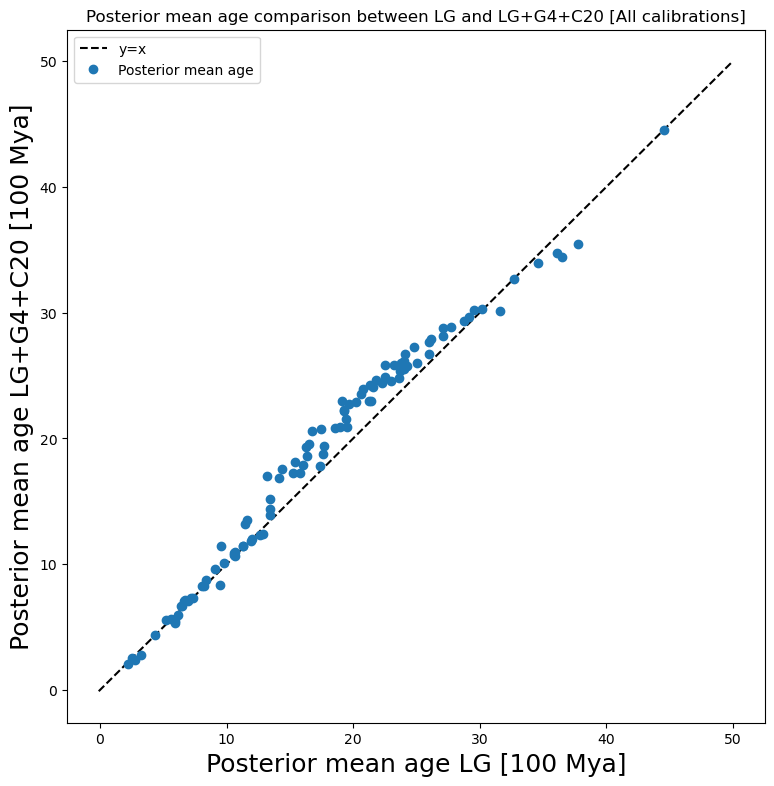

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_all_scatter.png')

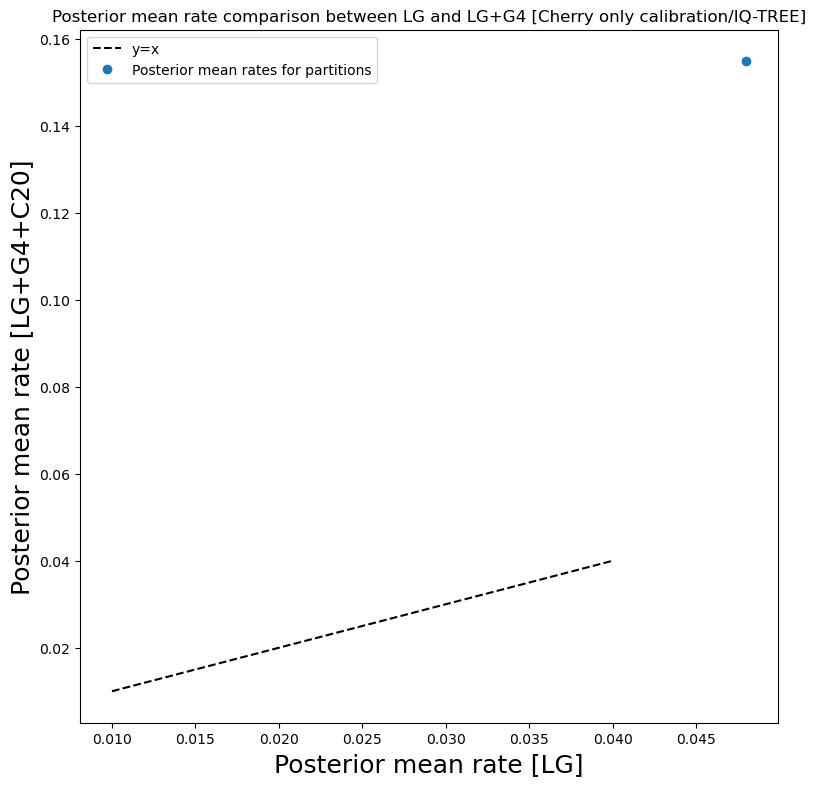

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')